In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1186709,1311426,B0BSVJCXSW,Replacement 12V AC-DC Adaptor Power Supply for...,0.0,0,13.99,False,0,Piano & Keyboard
852327,928185,B09ZPVFKH4,RIDDLED WITH STYLE Assorted Inflatable Footbal...,3.3,14,9.99,False,0,Sports Toys & Outdoor
989456,1094970,B0CCVJ7WCC,Callez RJ9 Phone Headset with Microphone Noise...,0.0,0,29.09,False,0,"Telephones, VoIP & Accessories"
603687,651374,B09HSZ9DYW,SHIMANO Unisex's Sh-xc702 Shoes Sneaker,0.0,0,154.28,False,0,Cycling Shoes
2030498,2287747,B00WZ0JACC,Babz Fitness Silver 65cm ANTI BURST GYM EXERCI...,3.6,30,16.99,False,0,Sports & Outdoors


# Part 1: Analyzing Best-Seller Trends Across Product Categories
## Objective: Understand the relationship between product categories and their best-seller status.

1. Crosstab Analysis:



In [2]:
# Create a crosstab between the product category and the isBestSeller status.
categ_bestsell_cross = pd.crosstab(index=df['category'], columns=df['isBestSeller'], normalize=True)

# Are there categories where being a best-seller is more prevalent?
# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.
categ_bestsell_cross.sort_values(by =True, ascending=False)

## There are definitely multiple categories with a higher number and proportion of bestsellers.

isBestSeller,False,True
category,,
Grocery,0.003686,0.000228
Health & Personal Care,0.003690,0.000226
Baby,0.006019,0.000140
Sports & Outdoors,0.342084,0.000135
Power & Hand Tools,0.003418,0.000125
...,...,...
Blank Media Cases & Wallets,0.000099,0.000000
Boating Footwear,0.000057,0.000000
Boxes & Organisers,0.000373,0.000000


2. Statistical Tests:


In [3]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
crosstab_result = pd.crosstab(index=df['category'], columns=df['isBestSeller'])
chi2_p_value = chi2_contingency(crosstab_result)[1]
print(f'Chi2 P value: {chi2_p_value}')

# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
print(f'Cramer V: {round(association(crosstab_result, method="cramer"),2)}')

Chi2 P value: 0.0
Cramer V: 0.12


3. Visualizations:

<Axes: xlabel='category'>

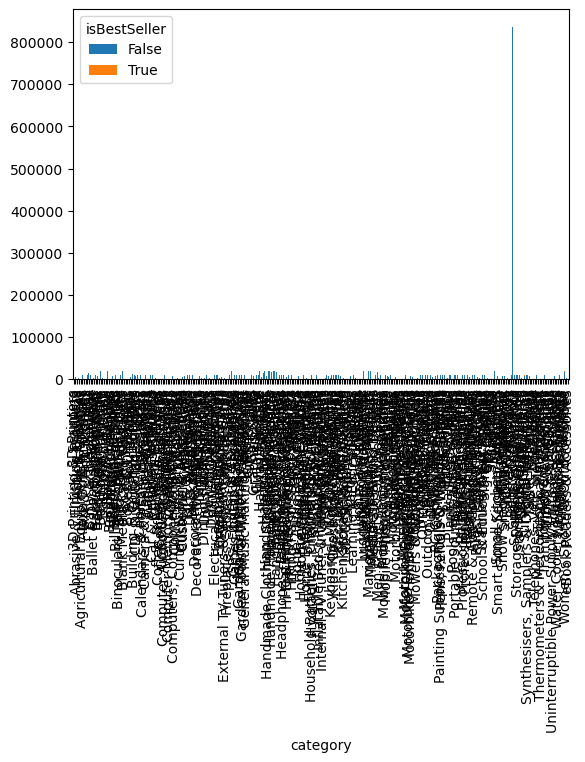

In [40]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True)

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
## Objective: Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices.


In [4]:
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times 
# the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
def test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (IQR * 1.5)
    higher_boundary = Q3 + (IQR * 1.5)
    outliers = data[(data<lower_boundary) | (data>higher_boundary)]
    return outliers

price_outliers = test_outliers(df['price'])
# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

1. Violin Plots:


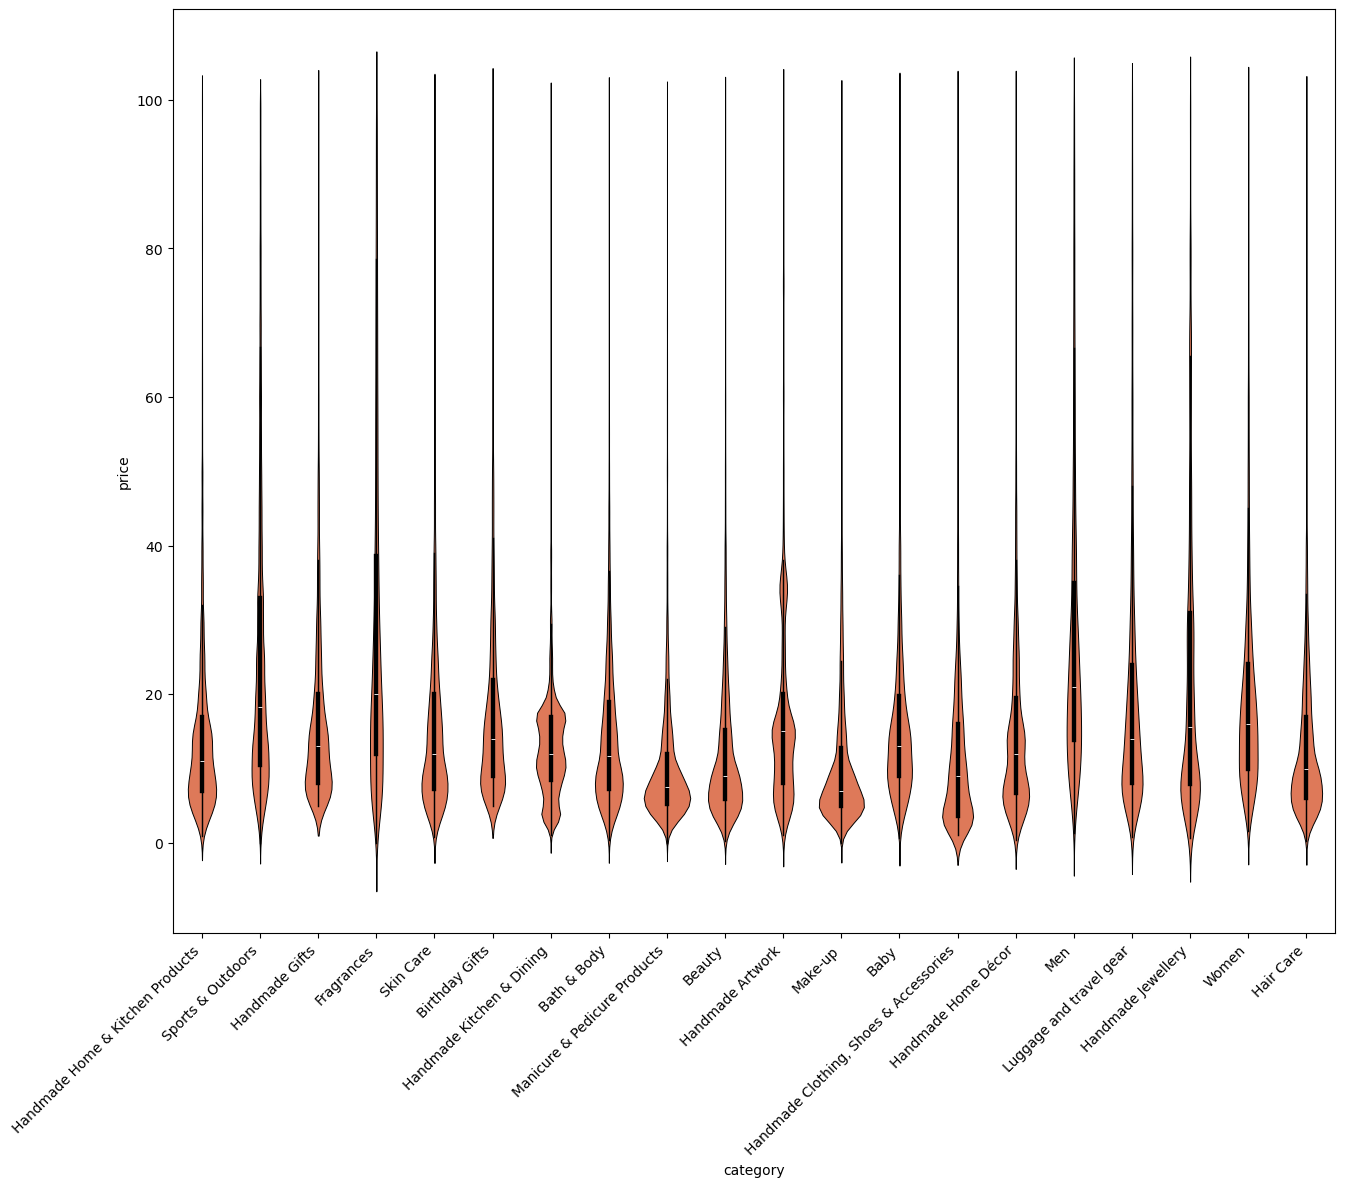

,price
category,
Desktop PCs,74.00
Boxing Shoes,69.79
Tablets,69.00
Graphics Cards,68.54
Motherboards,67.92
...,...
Adapters,7.05
Make-up,7.00
Signs & Plaques,6.99


In [51]:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

# Filtering out outliers
price_no_outliers = df.drop(labels=price_outliers.index)

# Getting the top 20 categories based on count
categories_sorted = price_no_outliers.groupby('category').count().sort_values(axis=0, by='price', ascending=False)
top_categories = categories_sorted.drop(labels=categories_sorted.index[20:])

#Filtering for the top 20 categories
df_violin = price_no_outliers[price_no_outliers['category'].isin(top_categories.index)]
plt.figure(figsize=(15, 12))
sns.violinplot(data=df_violin, x='category', y='price', color='#F46D43', linecolor="#000000", linewidth=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

# Which product category tends to have the highest median price? Don't filter here by top categories.
price_no_outliers[['price', 'category']].groupby('category').median().sort_values(axis=0, by='price', ascending=False)

2. Bar Charts:


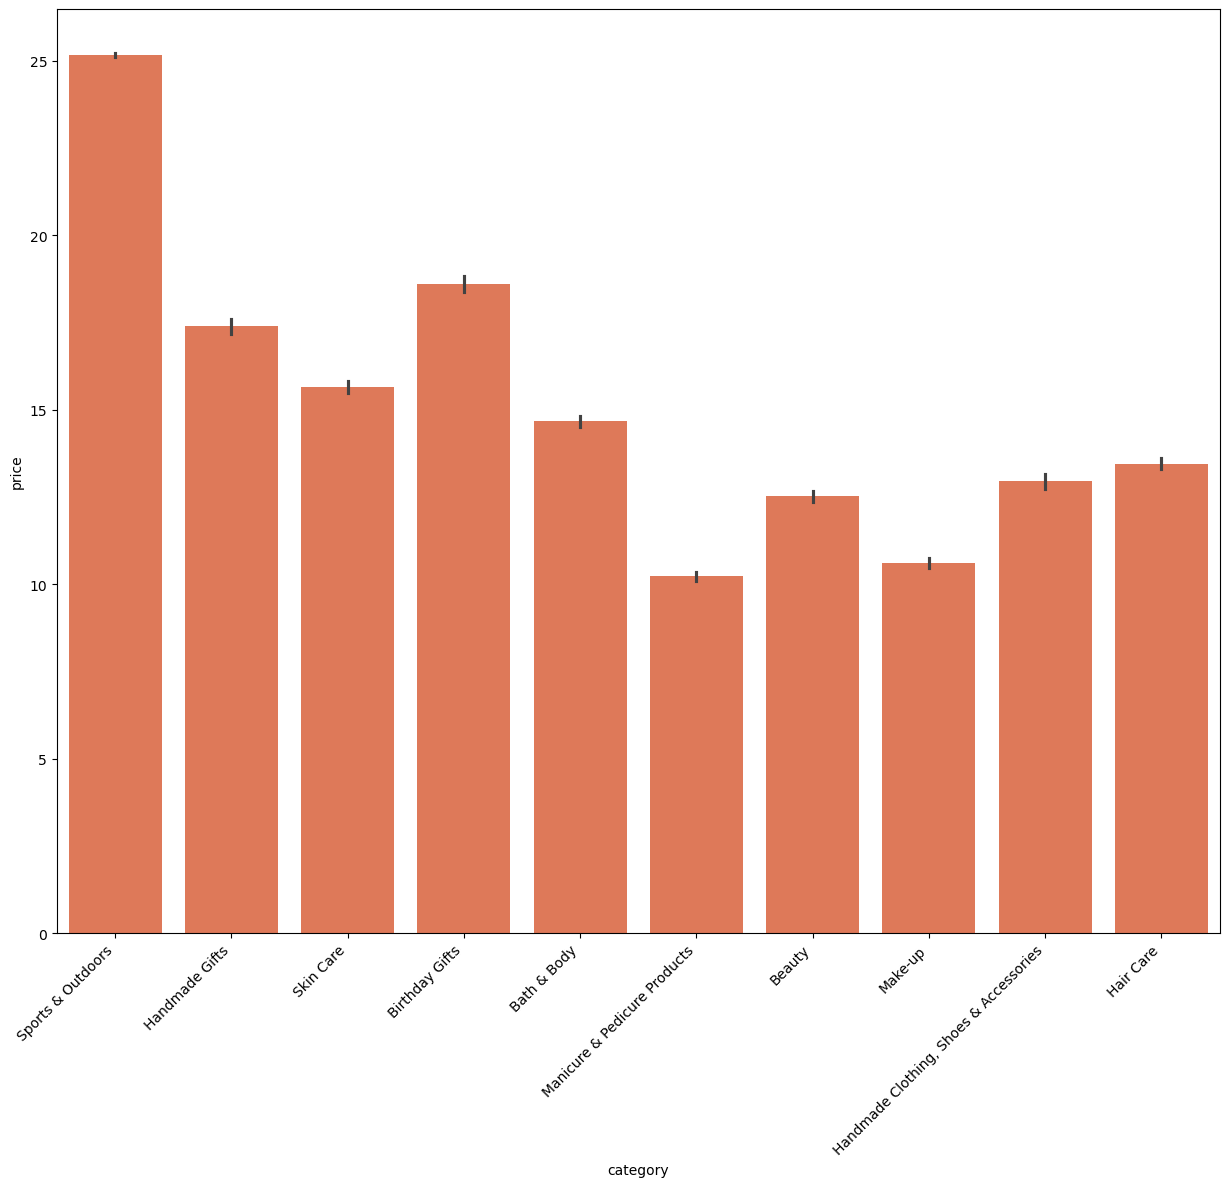

,price
category,
Motherboards,68.772432
Boxing Shoes,67.417803
Desktop PCs,66.915562
Tablets,66.552971
Graphics Cards,65.103509
...,...
Bedding Accessories,8.835220
Adapters,8.750197
Signs & Plaques,8.210513


In [59]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Filtering out outliers
price_no_outliers = df.drop(labels=price_outliers.index)

# Getting the top 10 categories based on count
categories_sorted = price_no_outliers.groupby('category').count().sort_values(axis=0, by='price', ascending=False)
top_categories = categories_sorted.drop(labels=categories_sorted.index[10:])

#Filtering for the top 10 categories
df_bar = price_no_outliers[price_no_outliers['category'].isin(top_categories.index)]
plt.figure(figsize=(15, 12))
sns.barplot(data=df_bar, x='category', y='price', color='#F46D43')
plt.xticks(rotation=45, ha='right')
plt.show()

# Which product category commands the highest average price? Don't filter here by top categories.
price_no_outliers[['price', 'category']].groupby('category').mean().sort_values(axis=0, by='price', ascending=False)

3. Box Plots:


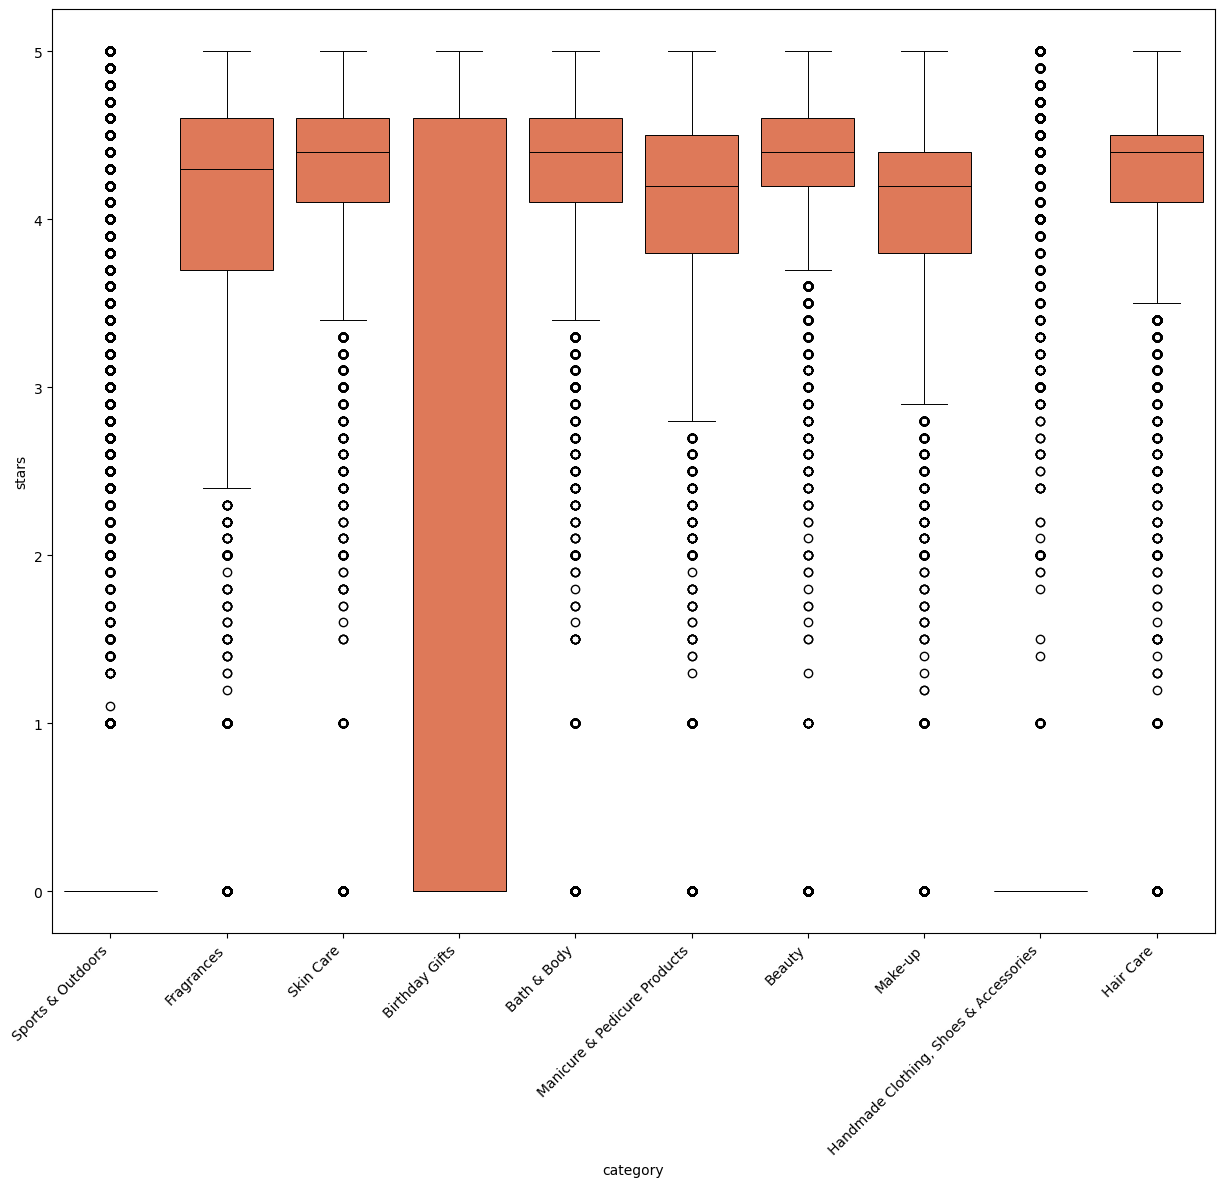

,stars
category,
Computer Memory,4.7
CPUs,4.6
Building & Construction Toys,4.6
Laptop Accessories,4.6
Hobbies,4.6
...,...
"Synthesisers, Samplers & Digital Instruments",0.0
Tablets,0.0
Action Cameras,0.0


In [66]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

# Getting the top 20 categories based on count
categories_sorted = df.groupby('category').count().sort_values(axis=0, by='stars', ascending=False)
top_categories = categories_sorted.drop(labels=categories_sorted.index[10:])

#Filtering for the top 20 categories
df_box = df[df['category'].isin(top_categories.index)]
plt.figure(figsize=(15, 12))
sns.boxplot(data=df_box, x='category', y='stars', color='#F46D43', linecolor="#000000", linewidth=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
df[['stars', 'category']].groupby('category').median().sort_values(axis=0, by='stars', ascending=False)

# Part 3: Investigating the Interplay Between Product Prices and Ratings
## Objective: Analyze how product ratings (stars) correlate with product prices.

1. Correlation Coefficients:

In [72]:
# Calculate the correlation coefficient between price and stars.
print(f'Pearson Correlation: {round(price_no_outliers['price'].corr(price_no_outliers['stars']),2)}')
print(f'Spearman Correlation: {round(price_no_outliers['price'].corr(price_no_outliers['stars'], method='spearman'),2)}')
# Is there a significant correlation between product price and its rating?
# Not really,both Pearson and Spearman yield low values close to 0.

Pearson Correlation: -0.08
Spearman Correlation: -0.07


2. Visualizations:


<Axes: xlabel='stars', ylabel='price'>

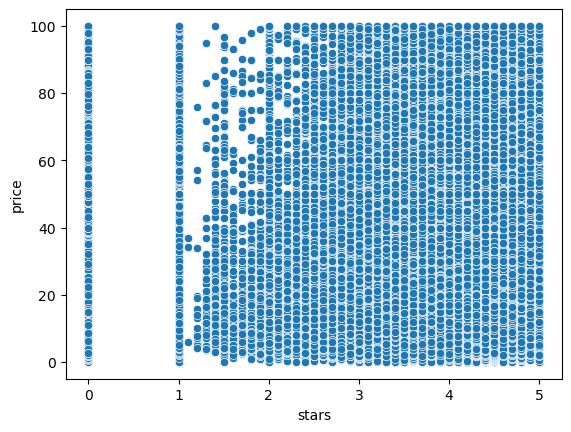

In [ ]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(data=price_no_outliers, x='stars', y='price')

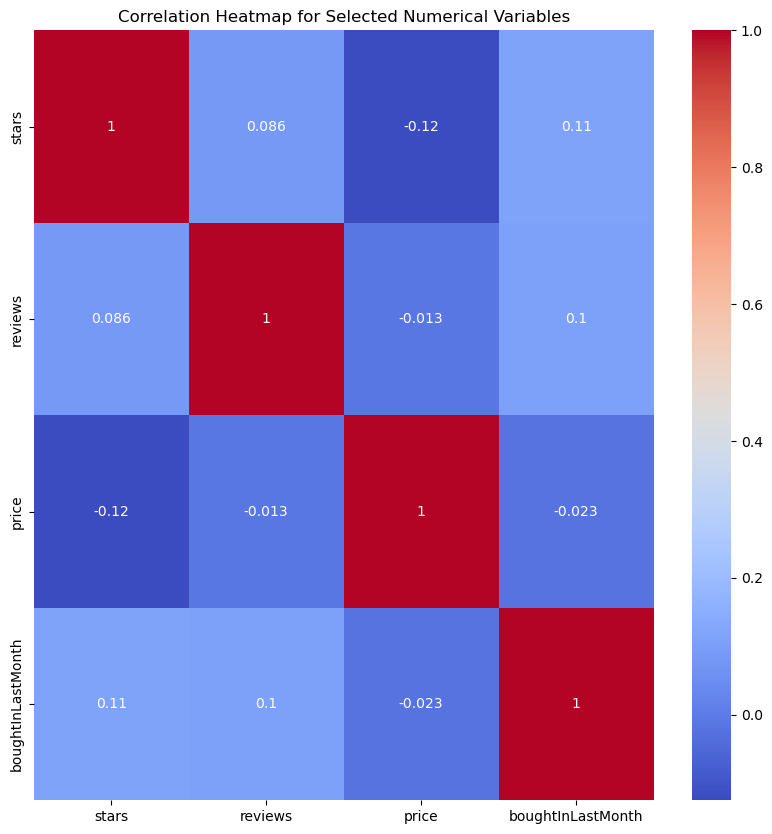

In [77]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

numerical_vars = df[['stars', 'reviews', 'price', 'boughtInLastMonth']]
corr_matrix = numerical_vars.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

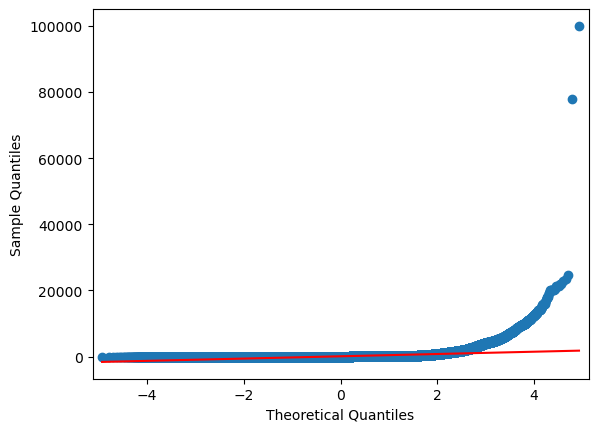

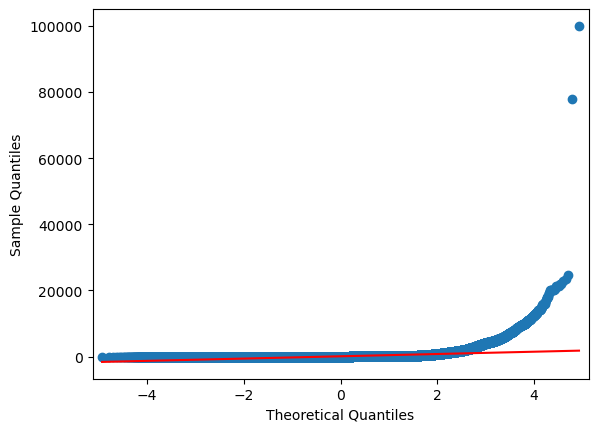

In [78]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm

sm.qqplot(df['price'], line='s')